In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

import matplotlib as mpl
import matplotlib.cm as cm
    
import sys  
sys.path.insert(0, '../src/')

import jsm_halopull
import jsm_prephalo
import jsm_stats
import galhalo
import mcmc_aux

## playing with delta

In [3]:
data = mcmc_aux.mock_SAGA_survey([2,0.1,0.3], SAGA_ind=8)

In [4]:
delta_pix = 50
delta = np.linspace(-0.4, 2, delta_pix)
s1_mat = np.zeros(shape=(delta_pix, 169))
s2_mat1 = np.zeros(shape=(delta_pix, 9000))
s2_mat2 = np.zeros(shape=(delta_pix, 9000))


for i in range(delta_pix):

    models_i = mcmc_aux.satgen_models([2,delta[i],0], data.lgMh)
    models_i.get_stats(min_mass=6.5)

    s1_mat[i] = models_i.stat.Pnsat
    s2_mat1[i] = models_i.stat.Msmax
    s2_mat2[i] = models_i.stat.ecdf_MsMax 

In [5]:
norm = mpl.colors.Normalize(vmin=delta.min(), vmax=delta.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.viridis_r)

colors = mpl.cm.viridis_r(np.linspace(0, 1, delta_pix))
halo_masses = np.linspace(7,13,100)

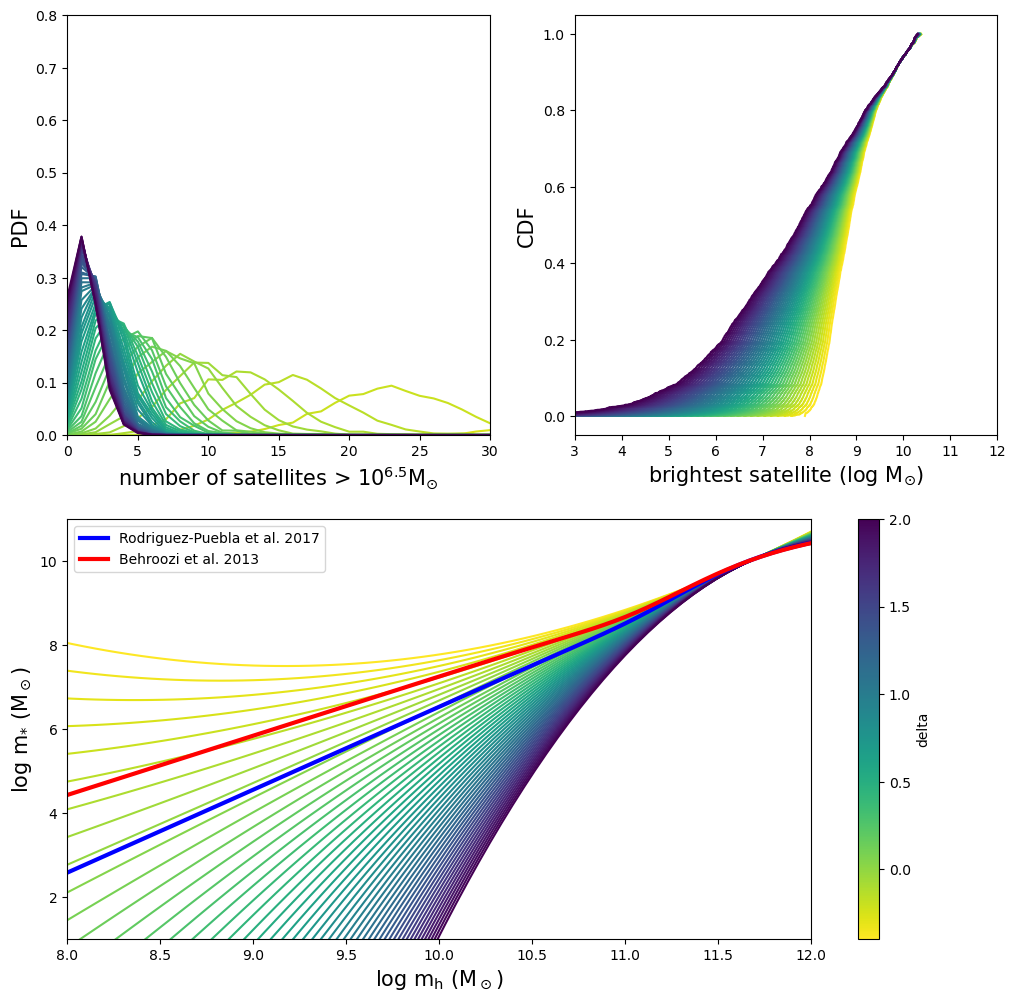

In [6]:
plt.figure(figsize=(12,12))
plt.subplot(221)
for i in range(delta_pix):
    plt.plot(np.arange(s1_mat.shape[1]), s1_mat[i], color=colors[i])
plt.xlabel("number of satellites > $10^{6.5} \mathrm{M_{\odot}}$", fontsize=15)
plt.ylabel("PDF", fontsize=15)
plt.xlim(0,30)
plt.ylim(0,0.8)

plt.subplot(222)
for i in range(delta_pix):
    plt.plot(s2_mat1[i], s2_mat2[i], color=colors[i])
plt.xlabel("brightest satellite ($\mathrm{log\ M_{\odot}}$)", fontsize=15)
plt.ylabel("CDF", fontsize=15)
plt.xlim(3,12)


plt.subplot(212)
for i in range(delta_pix):
    plt.plot(halo_masses, galhalo.SHMR_1D(halo_masses, alpha=2, delta=delta[i]), color=colors[i])
plt.plot(halo_masses, galhalo.lgMs_RP17(halo_masses), lw=3, color="blue", label="Rodriguez-Puebla et al. 2017")
plt.plot(halo_masses, galhalo.lgMs_B13(halo_masses), lw=3, color="red", label="Behroozi et al. 2013")
plt.ylabel("log m$_{*}$ (M$_\odot$)", fontsize=15)
plt.xlabel("log m$_{\mathrm{h}}$ (M$_\odot$)", fontsize=15)
plt.ylim(1,11)
plt.xlim(8,12)
plt.colorbar(cmap, label="delta")
plt.legend()
plt.show()